In [1]:
import pandas as pd
import numpy as np
import itertools
import tensorflow
import tensorflow.keras as keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time

In [2]:
img_width, img_height = 224, 224  
   

top_model_weights_path = 'bottleneck_fc_model.h5' 

train_data_dir = 'data/train'  
validation_data_dir = 'data/validation'  
test_data_dir = 'data/test'
   
epochs = 7   
batch_size = 50  

In [3]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet') 

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)


In [5]:
start = datetime.datetime.now()

datagen = ImageDataGenerator(rescale=1. / 255)  

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict(generator, steps=predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)

end = datetime.datetime.now()
elapsed = end - start
print('Time:', elapsed)

Found 8141 images belonging to 5 classes.
163/163 [==============================] - 855s 5s/step
Time: 0:14:17.605772


In [6]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [7]:
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)
print('-'*117)

Found 1171 images belonging to 5 classes.
24/24 [==============================] - 122s 5s/step
Time:  0:02:03.543579
---------------------------------------------------------------------------------------------------------------------


In [8]:
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1769 images belonging to 5 classes.
36/36 [==============================] - 184s 5s/step
Time:  0:03:04.937100


In [9]:
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
train_data = np.load('bottleneck_features_train.npy')  
   
train_labels = generator_top.classes  
   
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 8141 images belonging to 5 classes.


In [10]:
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 1171 images belonging to 5 classes.


In [11]:
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1769 images belonging to 5 classes.


In [12]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Epoch 1/7
163/163 [==============================] - 6s 27ms/step - loss: 0.7222 - acc: 0.7299 - val_loss: 0.4794 - val_acc: 0.8301
Epoch 2/7
163/163 [==============================] - 4s 23ms/step - loss: 0.3739 - acc: 0.8684 - val_loss: 0.2602 - val_acc: 0.9214
Epoch 3/7
163/163 [==============================] - 4s 23ms/step - loss: 0.2784 - acc: 0.9066 - val_loss: 0.2305 - val_acc: 0.9240
Epoch 4/7
163/163 [==============================] - 4s 24ms/step - loss: 0.2159 - acc: 0.9286 - val_loss: 0.1754 - val_acc: 0.9402
Epoch 5/7
163/163 [==============================] - 4s 22ms/step - loss: 0.1820 - acc: 0.9374 - val_loss: 0.1648 - val_acc: 0.9394
Epoch 6/7
163/163 [==============================] - 4s 24ms/step - loss: 0.1472 - acc: 0.9506 - val_loss: 0.1835 - val_acc: 0.9368
Epoch 7/7
24/24 [==============================] - 0s 4ms/step - loss: 0.1353 - acc: 0.9539
[INFO] accuracy: 95.39%
[INFO] Loss: 0.13533011078834534
Time:  0:00:29.676961


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 100)               2508900   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 2,514,205
Trainable params: 2,514,205
Non-

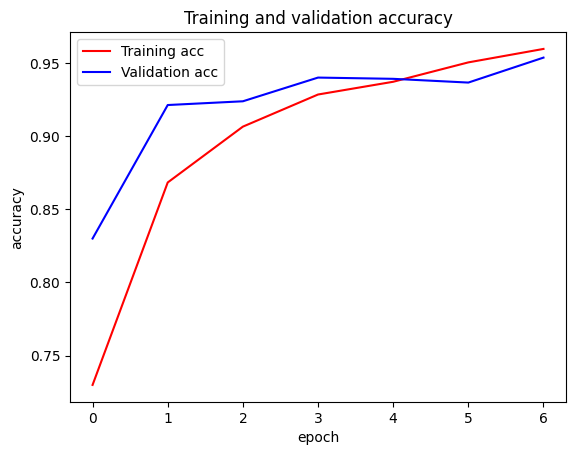

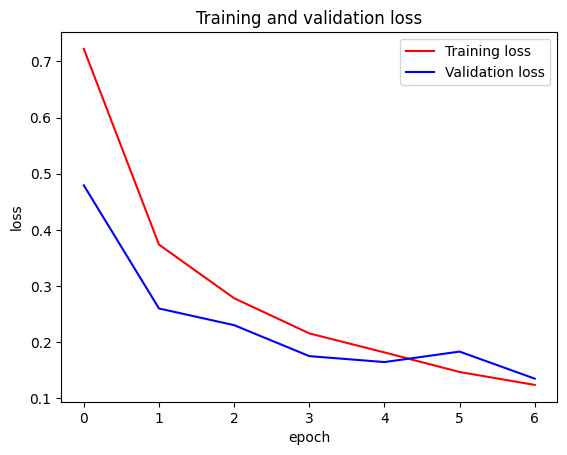

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_data, test_labels)

56/56 [==============================] - 0s 3ms/step - loss: 0.1272 - acc: 0.9621


[0.12721459567546844, 0.9621254801750183]

In [16]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
print('rounded test_labels', preds)

test data [[[[1.2709097  0.         0.         ... 0.         0.7604671
    0.        ]
   [0.78320754 0.         0.         ... 0.         0.5396126
    0.        ]
   [0.10663851 0.         0.         ... 0.         0.2897682
    0.        ]
   ...
   [0.13358322 0.         0.21409383 ... 0.44194305 0.7197196
    0.        ]
   [0.02742632 0.         0.13566804 ... 0.5759761  1.3386941
    0.        ]
   [0.38407215 0.         0.         ... 0.         1.3726888
    0.        ]]

  [[1.6255556  0.         0.83649033 ... 0.         0.7249998
    0.        ]
   [1.7474196  0.         0.5232428  ... 0.         0.80960315
    0.        ]
   [0.81290716 0.         0.5702067  ... 0.         0.65461963
    0.        ]
   ...
   [0.30360818 0.         0.         ... 0.62778884 0.8480411
    0.        ]
   [0.22867401 0.         0.         ... 0.7638519  1.3222156
    0.        ]
   [0.27664196 0.         0.         ... 0.4047509  1.4387919
    0.        ]]

  [[1.4878076  0.         1.487685

56/56 [==============================] - 0s 3ms/step
rounded test_labels [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [17]:
animals = [ 'cow','elephants', 'horses', 'Sheep', 'squirells']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

         cow       1.00      0.99      0.99       704
   elephants       0.99      0.94      0.97       197
      horses       0.83      0.92      0.88       152
       Sheep       0.98      0.91      0.94       472
   squirells       0.94      0.97      0.95       244

   micro avg       0.97      0.95      0.96      1769
   macro avg       0.95      0.95      0.95      1769
weighted avg       0.97      0.95      0.96      1769
 samples avg       0.95      0.95      0.95      1769



C:\Users\Augutsya Pandey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [19]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


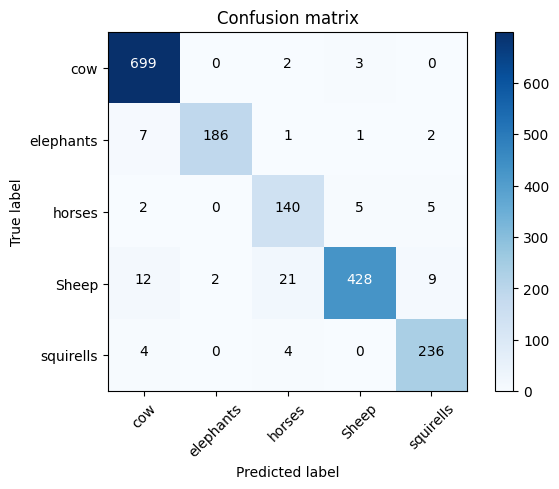

In [20]:
plot_confusion_matrix(confusion_matrix, ['cow', 'elephants', 'horses','Sheep', 'squirells'])


Normalized confusion matrix


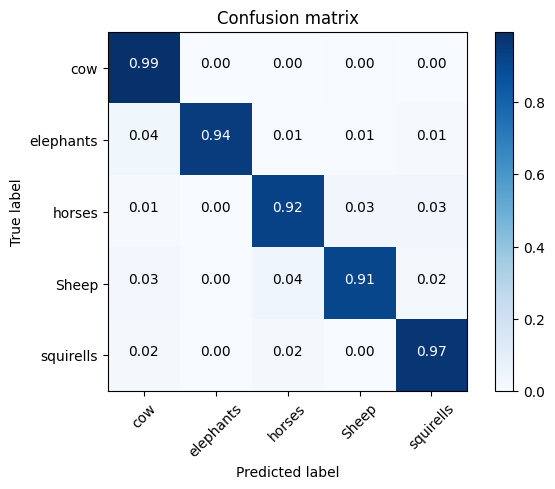

In [21]:
plot_confusion_matrix(confusion_matrix, 
                      ['cow', 'elephants', 'horses', 'Sheep', 'squirells'],
                     normalize=True)

In [22]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 64ms/step
ID: 0, Label: cow 0.0%
ID: 1, Label: elephants 0.0%
ID: 2, Label: horses 99.91%
ID: 3, Label: Sheep 0.05%
ID: 4, Label: squirells 0.04%
Final Decision:
.
..
...
1/1 [==============================] - 0s 31ms/step
ID: 2, Label: elephants


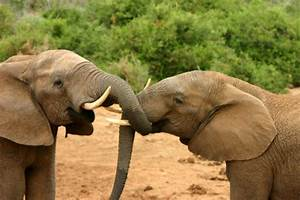

In [23]:
import numpy as np

def test_single_image(path):
    animals = ['cow', 'elephants', 'horses', 'Sheep', 'squirells']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)
    preds = model.predict(bt_prediction)
    for idx, animal, x in zip(range(0, 5), animals, preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x * 100, 2)))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.' * (x + 1))
        time.sleep(.2)
    class_predicted = model.predict(bt_prediction)
    class_index = np.argmax(class_predicted[0])  
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    class_label = inv_map[class_index] 
    print("ID: {}, Label: {}".format(class_index, class_label))
    return load_img(path)

path = 'data/test/elephants/OIP-XM-9quCuvL5sGvykoN-DUwHaE8.jpeg'
test_single_image(path)


[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 25ms/step
ID: 0, Label: cow 0.0%
ID: 1, Label: elephants 100.0%
ID: 2, Label: horses 0.0%
ID: 3, Label: Sheep 0.0%
ID: 4, Label: squirells 0.0%
Final Decision:
.
..
...
1/1 [==============================] - 0s 14ms/step
ID: 1, Label: cow


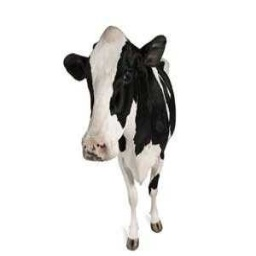

In [27]:


path = 'data/test/cow/PS3ICNZCH2CN.jpg'
test_single_image(path)

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 30ms/step
ID: 0, Label: cow 0.0%
ID: 1, Label: elephants 0.0%
ID: 2, Label: horses 99.93%
ID: 3, Label: Sheep 0.04%
ID: 4, Label: squirells 0.03%
Final Decision:
.
..
...
1/1 [==============================] - 0s 42ms/step
ID: 2, Label: elephants


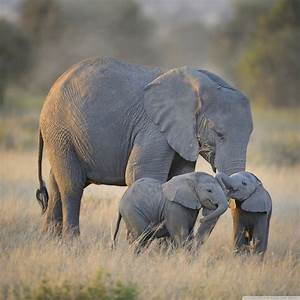

In [25]:


path = 'data/test/elephants/OIP-v9Au4wvcOhj5MSMk421biQHaHa.jpeg'
test_single_image(path)

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 25ms/step
ID: 0, Label: cow 0.0%
ID: 1, Label: elephants 0.0%
ID: 2, Label: horses 0.01%
ID: 3, Label: Sheep 99.99%
ID: 4, Label: squirells 0.0%
Final Decision:
.
..
...
1/1 [==============================] - 0s 31ms/step
ID: 3, Label: horses


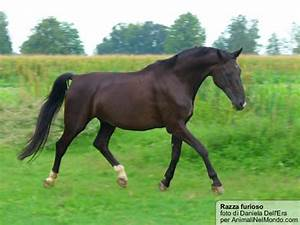

In [26]:
path = 'data/test/horses/OIP-UhmiDaJwntE9lEdfNFKSrwHaFj.jpeg'
test_single_image(path)